In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import glob
from dask.diagnostics import ProgressBar

In [2]:
rootdir = '/local/projects/bSOSE_carbon/budget-DIC/netcdf/'
filename = 'bsose_i133_2013to2018_5day_2013-*_budget-DIC.nc'
paths = sorted(glob.glob(rootdir+filename))[:-1]
ds = xr.open_mfdataset(paths)

In [3]:
ds

<xarray.Dataset>
Dimensions:  (XC: 2160, YC: 588, Z: 52, time: 72)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-05 2013-01-10 ... 2013-12-26
  * Z        (Z) float32 -2.1 -6.7 -12.15 -18.55 ... -5e+03 -5.4e+03 -5.8e+03
  * YC       (YC) float32 -77.98 -77.95 -77.91 -77.88 ... -30.02 -29.87 -29.72
  * XC       (XC) float32 0.08333 0.25 0.4167 0.5833 ... 359.4 359.6 359.8 359.9
    Depth    (YC, XC) float32 dask.array<chunksize=(588, 2160), meta=np.ndarray>
    rA       (YC, XC) float32 dask.array<chunksize=(588, 2160), meta=np.ndarray>
    drF      (Z) float32 dask.array<chunksize=(52,), meta=np.ndarray>
    hFacC    (Z, YC, XC) float32 dask.array<chunksize=(52, 588, 2160), meta=np.ndarray>
    iter     (time) int64 2520 2880 3240 3600 3960 ... 27000 27360 27720 28080
    Zl       float32 0.0
Data variables:
    TEND     (time, Z, YC, XC) float64 dask.array<chunksize=(1, 52, 588, 2160), meta=np.ndarray>
    ADV      (time, Z, YC, XC) float64 dask.array<chunksize=(1, 52, 588, 2160), meta=np.ndarray>
    DIFF     (time, Z, YC, XC) float64 dask.array<chunksize=(1, 52, 588, 2160), meta=np.ndarray>
    SURF     (time, Z, YC, XC) float64 dask.array<chunksize=(1, 52, 588, 2160), meta=np.ndarray>
    BIO      (time, Z, YC, XC) float64 dask.array<chunksize=(1, 52, 588, 2160), meta=np.ndarray>
    CORR     (time, Z, YC, XC) float64 dask.array<chunksize=(1, 52, 588, 2160), meta=np.ndarray>
    FORC     (time, Z, YC, XC) float64 dask.array<chunksize=(1, 52, 588, 2160), meta=np.ndarray>
    EPS      (time, Z, YC, XC) float64 dask.array<chunksize=(1, 52, 588, 2160), meta=np.ndarray>
    RES      (time, Z, YC, XC) float64 dask.array<chunksize=(1, 52, 588, 2160), meta=np.ndarray>

[####################                    ] | 50% Completed |  4min 58.5s


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



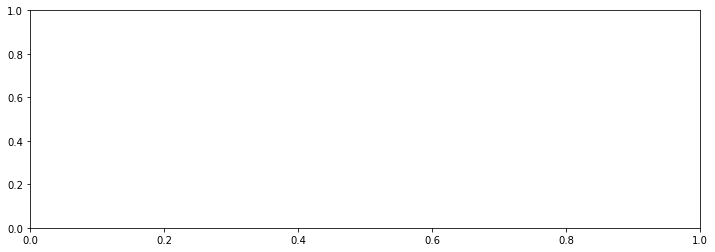

In [45]:
fig,ax=plt.subplots(figsize=(12,4))
for term in ds.data_vars:
    with ProgressBar():
        iselect = {'YC':slice(0,-1),'Z':slice(0,-1)}
        dsnow = (ds[term]*ds['rA']).isel(iselect).sum(['XC','Z']).mean('time')
        dsnow.plot(ax=ax,label=term)
ax.legend(loc='upper left',bbox_to_anchor=(1.05,1))

In [24]:
ds_xzsum_timemean = xr.Dataset()
for term in ds.data_vars:
    with ProgressBar():
        ds_xzsum_timemean[term]=ds[term].isel(Z=slice(1,-1),YC=slice(0,-1)).sum(['XC','Z']).mean('time').load()

[########################################] | 100% Completed |  1min 31.7s
[########################################] | 100% Completed |  1min 19.9s
[########################################] | 100% Completed |  1min 30.9s
[########################################] | 100% Completed |  1min 29.8s
[########################################] | 100% Completed |  1min 31.6s
[########################################] | 100% Completed |  1min 30.9s
[########################################] | 100% Completed |  1min 30.9s
[########################################] | 100% Completed |  1min 30.1s
[########################################] | 100% Completed |  1min 31.3s


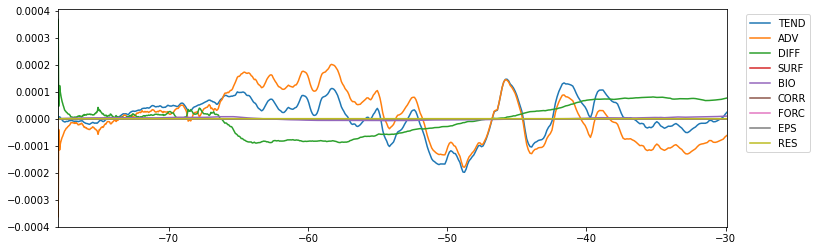

In [25]:
fig,ax = plt.subplots(figsize=(12,4))
for term in ds_xzsum_timemean.data_vars:
    dsnow = ds_xzsum_timemean[term]
    ax.plot(dsnow['YC'],dsnow,label=term)
ax.legend(loc='upper left',bbox_to_anchor=(1.02,1))
ax.autoscale(enable=True,axis='x',tight=True)
# fig.savefig('../figures/carbonbudget_xzsum.timemean.png',transparent=True)

[########################################] | 100% Completed | 34.4s


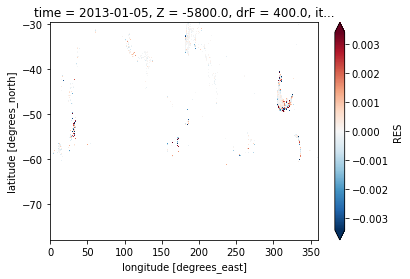

In [27]:
with ProgressBar():
    ds['RES'].isel(time=0,Z=-1).plot(robust=True)

[########################################] | 100% Completed | 31.1s


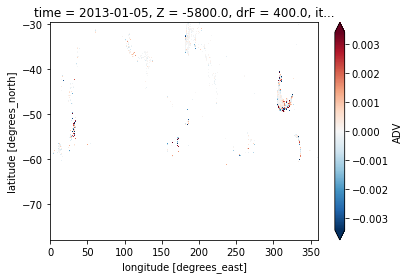

In [28]:
with ProgressBar():
    ds['ADV'].isel(time=0,Z=-1).plot(robust=True)